# Data Visualization Basics

## Why do we need Data visualization

It is a fundamental part of a data scientists toolkit. We primarily use data visualization:
- To *explore* data
- To *communicate* data

Goals for this week:
- Concentrate on building skills that we will need to start exploring data on our own and to produce relevant visualizations.

# Matplotlib

Link: https://matplotlib.org/

Note: Matplotlib like pandas is not a core part of the Python Library, therefore we have to download it by using:

```python -m pip install matplotlib```

We will be using ```matplitlib.pyplot``` module. ```pyplot``` maintains an internal state in which we can build visualization step by step.



In [ ]:
from matplotlib import pyplot as plt

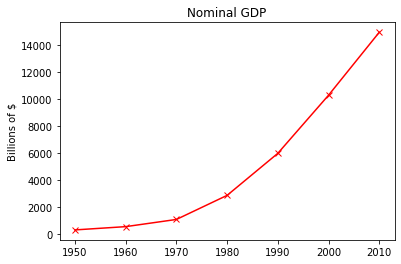

In [ ]:


years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.2,1075.9,2862.5,5979.6,10289.7,14958.3]

# Create a line chart, 
# x-axis : years
# y-axis : gdp

plt.plot(years,gdp,color = 'red',marker = 'x',linestyle = 'solid')

# add a title 
plt.title("Nominal GDP")

# Add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

## Bar Charts

- A good choise when we want to show that *some quantity varies amound some discrete set of items*. 

Example :
### How many academy awards were won by each movie

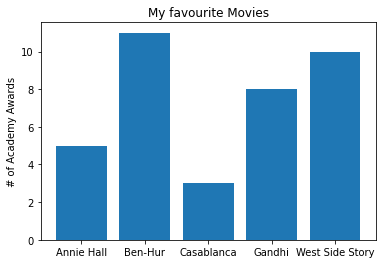

In [ ]:
movies = ["Annie Hall","Ben-Hur","Casablanca","Gandhi","West Side Story"]
num_of_oscars = [5,11,3,8,10]

# plot bars with 
# left x-coordinates [0,1,2,3,4]
# y-cordinates [num_of_oscars]
plt.bar(range(len(movies)),num_of_oscars)

# add title
plt.title("My favourite Movies")

# label the y-axis
plt.ylabel("# of Academy Awards")
# Label x-axis with movie titles
plt.xticks(range(len(movies)),movies)

plt.show()

Another good use of a bar chart can be for plotting histograms of numeric values (bucketed). This can help us visualize distributions

### Example: Grade Distribution

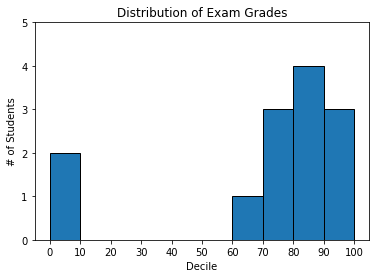

In [ ]:
from collections import Counter
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]


# Buckt grades by decile, but put 100 in with the 90s

histogram = Counter(min(grade//10*10,90)for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],    # Shift bars right by 5
        histogram.values(),             # Give each bar its correct height
        10,                             # Give each bar a width of 10
        edgecolor = (0,0,0)             # Black edges for each bar
        )            

plt.axis([-5,105,0,5])                  # x-axis from -5 to 105
                                        # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0,10, ..., 100

plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam Grades")
plt.show()

### Examining the code
- Notice the third argument to the ```plt.bar```, this specified the bar width. 
- We also shifted the bars right by 5, so that, for example, the "10" bar (which corresponds to 10-20 would have its center at 15).
- We also added a black edge to each bar to make them visually distinct
- The call to ```plt.axis``` indicates that we want the x-axis to range from -5 to 105 (to leave a little space on the left and right)
- The y-axis should range from 0 to 5
- Lastly, ```plt.xticks``` puts x-axis labels at 0,10,20, ..., 100.

## Line Charts

The good thing is it is easy to make line charts simple using ```plt.plot``` these are good for showing trends.


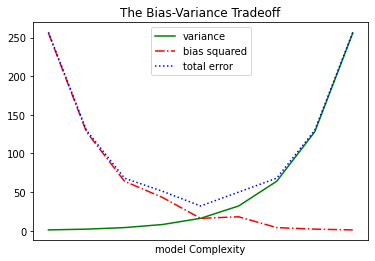

In [ ]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,43,16,18,4,2,1]
total_error = [x + y for x,y in zip(variance,bias_squared)]
xs = [i for i, _ in enumerate(variance)]


# We can make multiple calls to plt.plot
# to show multiple series on the same chart

plt.plot(xs,variance, 'g-', label = 'variance')
plt.plot(xs,bias_squared, 'r-.',label = 'bias squared')
plt.plot(xs,total_error, 'b:',label = 'total error')


# Because we've assigned labels for each series, 
# we can get a legend 
plt.legend(loc = 9)
plt.xlabel("model Complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()


## Scatterplots

A scatter plot is the right choice for visualizing the relationship between two paired sets of data. 


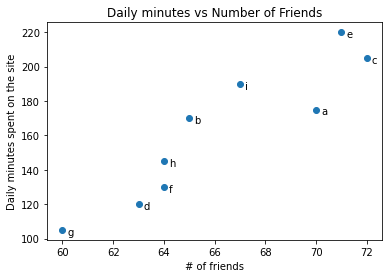

In [ ]:
friends = [70,65,72,63,71,64,60,64,67]
minutes = [175,170,205,120,220,130,105,145,190]
labels = ['a','b','c','d','e','f','g','h','i']

plt.scatter(friends,minutes)

# label each point 
for label,friend_count,minute_count in zip(labels,friends,minutes):
  plt.annotate(label,
               xy=(friend_count,minute_count), # Put the label with its point
               xytext = (5,-5),
               textcoords = 'offset points'
               )
  
plt.title("Daily minutes vs Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("Daily minutes spent on the site")
plt.show()

# Pandas

Matplot is fairly a low level tool. This is because we are assembling a plot form its base components, e.g:
- Type of plot
  - line
  - bar
  - box
  - scatter
  - countour etc,
- legend
- title
- tick labels

With pandas we have multiple columns of data with row and column labels, pandas has built in methods that simplify creating visualizations from DataFrames and Series Objects.

Another library is ```seaborn``` which is a statistical graphics library.
We will be using seaborn in the latter half of our course.

For now lets plot using Pandas

In [4]:
import pandas as pd
import numpy as np

## Line Plots


### Series

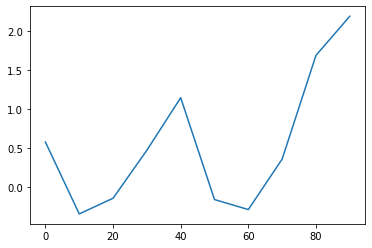

In [8]:
s = pd.Series(np.random.randn(10),index = np.arange(0,100,10))
s.plot()

In this plt above Here are the important points we should observe:
- the Series object's index is passed to matplotlib for plotting on the x-axis, though we can disable this by passing ```use_index = False```.
- The x-axis and y-axis properties can be modified by using ```xticks```, ```xlim```, ```yticks``` and ```ylim```



### DataFrame

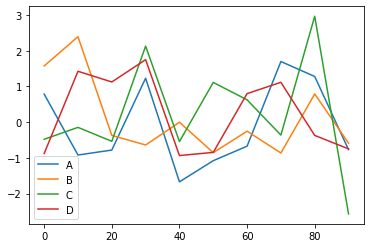

In [13]:
df = pd.DataFrame(np.random.randn(10,4),
                  columns=['A','B','C','D'],
                  index = np.arange(0,100,10)
                  )

df.plot()

The ```plot``` attribute contains a "family" of methods for different plot types